In [1]:
import numpy as np
from astropy.modeling import models
import astropy.units as u
from specutils import Spectrum1D, SpectralRegion

In [7]:
np.random.seed(42)
g1 = models.Gaussian1D(1, 4.6, 0.2)
g2 = models.Gaussian1D(2.5, 5.5, 0.1)
g3 = models.Gaussian1D(-1.7, 8.2, 0.1)
x = np.linspace(0, 10, 200)
y = g1(x) + g2(x) + g3(x) + np.random.normal(0., 0.3, x.shape)
spectrum = Spectrum1D(flux=y*u.Jy, spectral_axis=x*u.um)

In [2]:
pip install specutils


Note: you may need to restart the kernel to use updated packages.


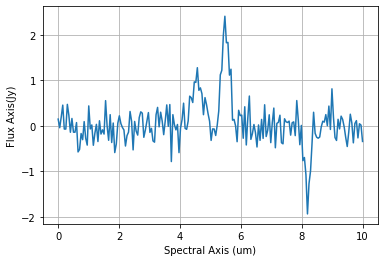

In [8]:
from matplotlib import pyplot as plt
plt.plot(spectrum.spectral_axis, spectrum.flux) 
plt.xlabel('Spectral Axis ({})'.format(spectrum.spectral_axis.unit)) 
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit)) 
plt.grid(True) 

In [11]:
#Find_lines_threshold

In [17]:
from specutils.manipulation import noise_region_uncertainty
noise_region = SpectralRegion(0*u.um, 3.5*u.um)
spectrum = noise_region_uncertainty(spectrum, noise_region)

from specutils.fitting import find_lines_threshold
lines = find_lines_threshold(spectrum, noise_factor=3)

lines[lines['line_type'] == 'emission']  


If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
um,,
float64,str10,int64
4.572864321608041,emission,91
4.673366834170855,emission,93
5.477386934673367,emission,109
8.99497487437186,emission,179


In [18]:
lines[lines['line_type'] == 'absorption']  


line_center,line_type,line_center_index
um,,
float64,str10,int64
8.190954773869347,absorption,163


In [19]:
 #find_lines_derivative

In [20]:
noise_region = SpectralRegion(0*u.um, 3*u.um)
from specutils.fitting import find_lines_derivative
lines = find_lines_derivative(spectrum, flux_threshold=0.75)
lines[lines['line_type'] == 'emission']  



If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning. [specutils.analysis.flux]

If you want to suppress this warning either type 'specutils.conf.do_continuum_function_check = False' or see http://docs.astropy.org/en/stable/config/#adding-new-configuration-items for other ways to configure the warning.


line_center,line_type,line_center_index
um,,
float64,str10,int64
4.472361809045227,emission,89
5.42713567839196,emission,108
8.99497487437186,emission,179


In [21]:
lines[lines['line_type'] == 'absorption']  


line_center,line_type,line_center_index
um,,
float64,str10,int64
8.190954773869347,absorption,163


In [25]:
from specutils import SpectralRegion
from specutils.fitting import estimate_line_parameters
from specutils.manipulation import extract_region



In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum
data = np.loadtxt('2500to10500Synthe100000resolution.txt')
x = data[:, 0]
y = data[:, 1]
x1=x[0:1000]
y1=y[0:1000]
flux=y1*(u.erg / (u.cm ** 2 * u.s * u.AA))
spectral_axis = x1*u.AA
spectrum = Spectrum1D(flux, spectral_axis)
sub_region = SpectralRegion(4*u.AA, 5*u.AA)
sub_spectrum = extract_region(spectrum, sub_region)

In [33]:
from specutils import SpectralRegion
from specutils.fitting import estimate_line_parameters
from specutils.manipulation import extract_region
from specutils.analysis import centroid, fwhm

sub_region = SpectralRegion(3000*u.um, 10500*u.um)
sub_spectrum = extract_region(spectrum, sub_region)

ricker = models.RickerWavelet1D()
ricker.amplitude.estimator = lambda s: max(s.flux)
ricker.x_0.estimator = lambda s: centroid(s, region=None)
ricker.sigma.estimator = lambda s: fwhm(s)

print(estimate_line_parameters(spectrum, ricker))  




Model: RickerWavelet1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
          amplitude               x_0               sigma      
    erg / (Angstrom cm2 s)      Angstrom           Angstrom    
    ---------------------- ------------------ -----------------
                 2850000.0 3152.2877420339046 5.789402173913004


In [34]:
#fit_lines
from specutils.fitting import fit_lines

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy import units as u
from specutils.spectra import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum
data = np.loadtxt('HD165024.txt')
x = data[:, 0]
y = data[:, 1]
flux=y*(u.erg / (u.cm ** 2 * u.s * u.AA))
spectral_axis = x*u.AA
spectrum = Spectrum1D(flux, spectral_axis)
from matplotlib import pyplot as plt
plt.plot(spectrum.spectral_axis, spectrum.flux) 
plt.xlabel('Spectral Axis ({})'.format(spectrum.spectral_axis.unit)) 
plt.ylabel('Flux Axis({})'.format(spectrum.flux.unit)) 
plt.grid(True) 